# Author : Jai Ganesh

# Task 1 : Prediction using Supervised Machine Learning

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check the shape of the data

df.shape

# Data has 25 records and 2 variables

(25, 2)

In [4]:
# Check the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Check the null values

df.isnull().sum()

# There is no null values in the data

Hours     0
Scores    0
dtype: int64

In [6]:
# Check the description of student_score data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Univariate Analysis

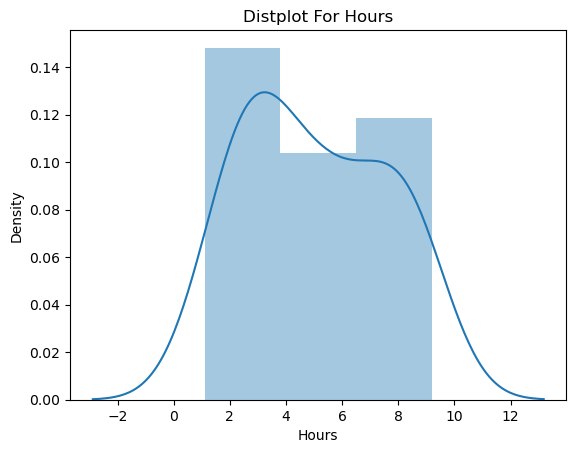

In [7]:
# Distplot for hours

sns.distplot(df.Hours)
plt.title('Distplot For Hours')
plt.show()

# Hours are slightly right skewed

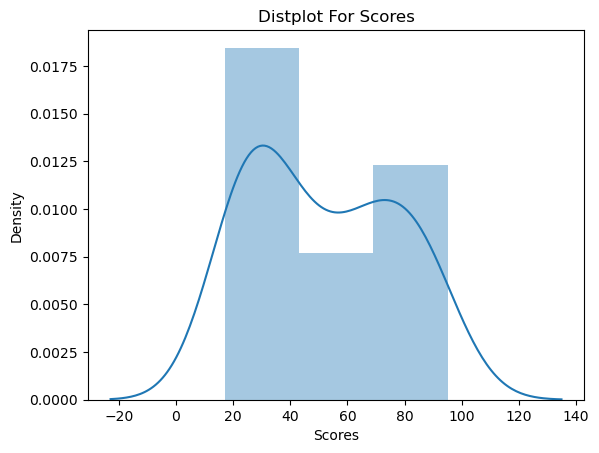

In [8]:
# Distplot for Scores

sns.distplot(df.Scores)
plt.title('Distplot For Scores')
plt.show()

### Bivariate Analysis

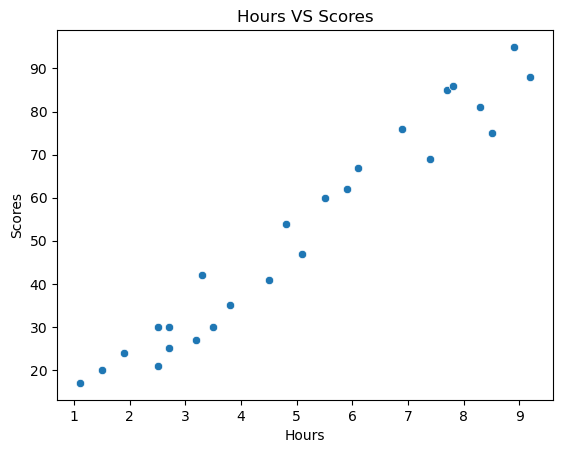

In [9]:
sns.scatterplot(df['Hours'],df['Scores'])
plt.title('Hours VS Scores')
plt.show()

#### As we can see that there is positive linear relation between the number of hours studied and percentage of Scores

### Analysis the Data Using Different Graphs

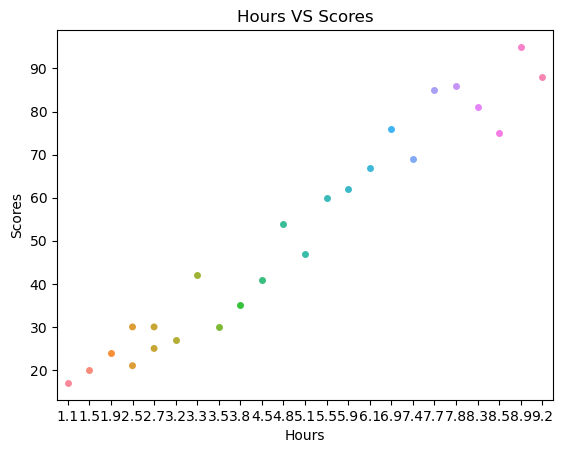

In [10]:
sns.swarmplot(df['Hours'],df['Scores'])
plt.title('Hours VS Scores')
plt.show()

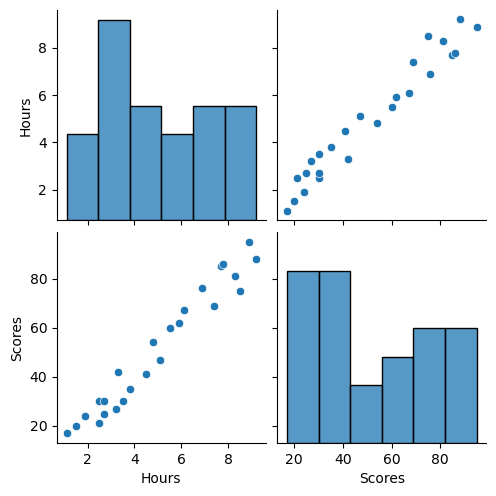

In [11]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

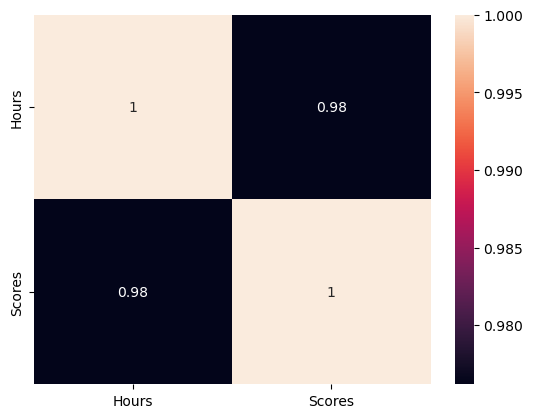

In [12]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

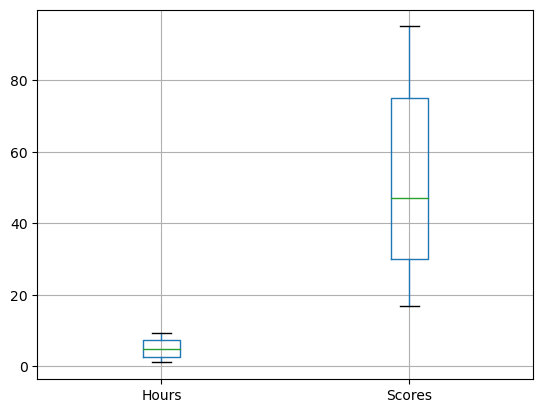

In [13]:
# Outlier detection
df.boxplot()

### Statistical Test

In [14]:
import scipy.stats as stats

# H0: the data is normal
# Ha: the data is not normal

for i in df :
    print(f"Pvalue of {i} is {stats.jarque_bera(df.loc[:,i])}")

#since the pvalue>0.05,We fail to reject the Ho meaning data is normal.

Pvalue of Hours is Jarque_beraResult(statistic=1.8580336151250898, pvalue=0.3949418233594212)
Pvalue of Scores is Jarque_beraResult(statistic=2.247338169134961, pvalue=0.32508483999924964)


### Num vs Num- T test ind

In [15]:
# H0 : There is no relation  between Hours and Scores
# Ha: There is relation between Hours and Scores
stats.ttest_ind(df['Hours'],df['Scores'])

Ttest_indResult(statistic=-9.142690841077545, pvalue=4.377952611625229e-12)

#### Since the pvalue > 0.05, So we reject the null hypothesis, Hence There is a relationship between the hours and Scores

### Model Building

In [16]:
# Importing the Liberaries for model 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, accuracy_score
from statsmodels.api import OLS,add_constant

In [17]:
# Spliting into train and test

from sklearn.model_selection import train_test_split

x= df.drop('Scores',axis=1)
y= df['Scores']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((17, 1), (8, 1), (17,), (8,))

In [18]:
#Statistical Base model

temp_xtrain= add_constant(xtrain)
temp_xtest= add_constant(xtest)

model=OLS(ytrain,temp_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     276.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.52e-11
Time:                        11:45:18   Log-Likelihood:                -53.493
No. Observations:                  17   AIC:                             111.0
Df Residuals:                      15   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3708      3.481      0.681      0.506      -5.048       9.790
Hours          9.7886      0.589     16.621      0.000       8.533      11.044
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.510
Skew:                          -0.211   Prob(JB):                        0.470
Kurtosis:                       1.602   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking for scores for training and test set 

In [19]:
pred_train=model.predict(temp_xtrain)
pred_test=model.predict(temp_xtest)

rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

print(" RMSE for train: ",rmse_train)
print("RMSE for test: ", rmse_test)

# MAE

mae_test=mean_absolute_error(ytest,pred_test)
print("MAE : ",mae_test)

#RMSE of 5 is telling us that the model prediction is deviation by 5 Hours

 RMSE for train:  5.627830870119195
RMSE for test:  4.792191274636314
MAE :  4.419727808027645


### Linear Model

In [20]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [21]:
print('Test Score',lr.score(xtest,ytest))
print('Training Score',lr.score(xtrain,ytrain))

Test Score 0.9568211104435257
Training Score 0.9484997422695115


In [22]:
y_pred=lr.predict(xtest)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

### Comparing Actual result to the Predicted Model result

In [23]:
df_p=pd.DataFrame({'Actual;':ytest, 'Predicted': y_pred})
df_p

,Actual;,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [24]:
#Predict The Score for 9.25 Hours
print('Number Of Hours = 9.25')
print('Students Who Study 9.25 hrs/day is',lr.predict([[9.25]]))

Number Of Hours = 9.25
Students Who Study 9.25 hrs/day is [92.91505723]


### Evaluating the model

In [25]:
print('Mean Absolute Error:',mean_absolute_error(ytest, y_pred)) 
print('Mean Squared Error:', mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, y_pred)))
print('R-2:',r2_score(ytest, y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
R-2: 0.9568211104435257


### R-2 gives the score of model fit and in this case we have R-2 = 0.9568211104435257 which is actually a great score for this model.

## E N D